# Video game sales analysis

TODO: Description

In [103]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML


sns.set(rc={"figure.figsize":(12,8)})
sns.set(style="white")

# Load data

In [2]:
zf = zipfile.ZipFile('../data/vgsales.csv.zip') 
df = pd.read_csv(zf.open('vgsales.csv'))

# Explore and prepare data

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# Convert year column to int type

df['Year'] = df['Year'].astype('Int64')

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
# Percentage of NaN values on each column 

df.isnull().mean().sort_values(ascending=False).mul(100).round(2).astype(str) + '%'

Year            1.63%
Publisher       0.35%
Global_Sales     0.0%
Other_Sales      0.0%
JP_Sales         0.0%
EU_Sales         0.0%
NA_Sales         0.0%
Genre            0.0%
Platform         0.0%
Name             0.0%
Rank             0.0%
dtype: object

In [7]:
# Clean NaN values

df_no_nan = df.dropna(how="any")

# Clean years after 2017 (there's 1)

df_clean = df_no_nan[df_no_nan['Year'] <= 2017]

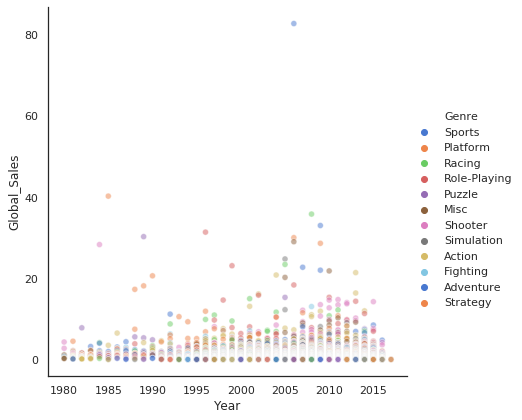

In [8]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Year", y="Global_Sales", hue="Genre", 
            alpha=.5, palette="muted",
            height=6, data=df_clean)

In [15]:
# Top 10 more selling games

df_clean[df_clean['Rank'] <= 10]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [18]:
tomas = df_clean[df_clean['Global_Sales'] <= 10]

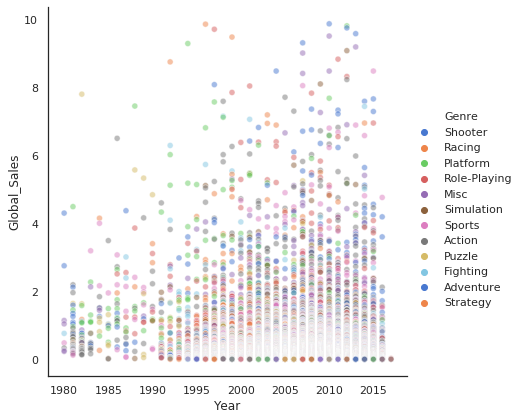

In [19]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Year", y="Global_Sales", hue="Genre", 
            alpha=.5, palette="muted",
            height=6, data=tomas)

In [29]:
# More succesful platforms (in terms of games unit sold)

df_clean.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.62
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
Name: Global_Sales, dtype: float64

In [30]:
# More succesful publisher (in terms of games unit sold)

df_clean.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

Publisher
Nintendo                        1784.43
Electronic Arts                 1093.39
Activision                       721.41
Sony Computer Entertainment      607.28
Ubisoft                          473.25
Take-Two Interactive             399.30
THQ                              340.44
Konami Digital Entertainment     278.56
Sega                             270.70
Namco Bandai Games               253.65
Name: Global_Sales, dtype: float64

In [122]:
df_clean['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [138]:
# dictionary with families information

families = {'Wii' : 'Nintendo', 
            'NES' : 'Nintendo',  
            'GB' : 'Nintendo',
            'DS' : 'Nintendo',
            'X360' : 'Microsoft',
            'PS3' : 'Sony',
            'PS2' : 'Sony',
            'SNES' : 'Nintendo',
            'GBA' : 'Nintendo',
            '3DS' : 'Nintendo',
            'PS4' : 'Sony',
            'N64' : 'Nintendo',
            'PS' : 'Sony',
            'XB' : 'Microsoft',
            'PC' : 'Microsoft',
            '2600' : 'Atari',
            'PSP' : 'Sony',
            'XOne' : 'Microsoft',
            'GC' : 'Nintendo',
            'WiiU' : 'Nintendo',
            'GEN' : 'Sega',
            'DC' : 'Sega',
            'PSV' : 'Sony',
            'SAT' : 'Sega',
            'SCD' : 'Sega',
            'WS' : 'Bandai',
            'NG' : 'SNK',
            'TG16' : 'NEC',
            '3DO' : 'Panasonic',
            'GG' : 'Sega',
            'PCFX' : 'NEC'
           }

In [149]:
df_platform_global_sales = df_clean.groupby(['Platform', 'Year']).sum()['Global_Sales'].reset_index()
df_platform_global_sales

,Platform,Year,Global_Sales
0,2600,1980,11.38
1,2600,1981,35.77
2,2600,1982,28.86
3,2600,1983,5.83
4,2600,1984,0.27
...,...,...,...
235,XB,2008,0.18
236,XOne,2013,18.60
237,XOne,2014,52.43
238,XOne,2015,57.66


In [150]:
df_platform_global_sales['Global_Sales_Cumsum']= df_platform_global_sales.groupby('Platform')['Global_Sales'].transform(pd.Series.cumsum)
df_platform_global_sales

,Platform,Year,Global_Sales,Global_Sales_Cumsum
0,2600,1980,11.38,11.38
1,2600,1981,35.77,47.15
2,2600,1982,28.86,76.01
3,2600,1983,5.83,81.84
4,2600,1984,0.27,82.11
...,...,...,...,...
235,XB,2008,0.18,252.09
236,XOne,2013,18.60,18.60
237,XOne,2014,52.43,71.03
238,XOne,2015,57.66,128.69


In [151]:
df_platform_global_sales['Family'] = df_platform_global_sales['Platform'].map(families)
df_platform_global_sales

,Platform,Year,Global_Sales,Global_Sales_Cumsum,Family
0,2600,1980,11.38,11.38,Atari
1,2600,1981,35.77,47.15,Atari
2,2600,1982,28.86,76.01,Atari
3,2600,1983,5.83,81.84,Atari
4,2600,1984,0.27,82.11,Atari
...,...,...,...,...,...
235,XB,2008,0.18,252.09,Microsoft
236,XOne,2013,18.60,18.60,Microsoft
237,XOne,2014,52.43,71.03,Microsoft
238,XOne,2015,57.66,128.69,Microsoft


In [249]:
# Example with an old video game system (2600)

df_platform_global_sales[df_platform_global_sales['Platform'] == '2600']

,Platform,Year,Global_Sales,Global_Sales_Cumsum,Family
0,2600,1980,11.38,11.38,Atari
1,2600,1981,35.77,47.15,Atari
2,2600,1982,28.86,76.01,Atari
3,2600,1983,5.83,81.84,Atari
4,2600,1984,0.27,82.11,Atari
5,2600,1985,0.45,82.56,Atari
6,2600,1986,0.66,83.22,Atari
7,2600,1987,1.98,85.20,Atari
8,2600,1988,0.75,85.95,Atari
9,2600,1989,0.62,86.57,Atari


In [154]:
df_platform_global_sales['Platform'].unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [265]:
# Top10 for a given year

current_year = 1989
dff = df_platform_global_sales[df_platform_global_sales['Year'].eq(current_year)].sort_values(by='Global_Sales_Cumsum', ascending=False).head(8)
dff

,Platform,Year,Global_Sales,Global_Sales_Cumsum,Family
84,NES,1989,7.85,223.52,Nintendo
9,2600,1989,0.62,86.57,Atari
38,GB,1989,64.98,66.41,Nintendo


In [160]:
df_platform_global_sales['Family'].unique()

array(['Atari', 'Panasonic', 'Nintendo', 'Sega', 'SNK', 'Microsoft',
       'NEC', 'Sony', 'Bandai'], dtype=object)

In [167]:
colors = dict(zip( 
    ["Atari",   "Panasonic", "Nintendo", "Sega",    "SNK",     "Microsoft", "NEC",     "Sony",    "Bandai"],
    ["#c3bc3f", "#bb7693",   "#ef6f6a",  "#8cc2ca", "#767676", "#55ad89",   "#a9b5ae", "#6388b4", "#baa094"]
))

group_lk = df_platform_global_sales.set_index('Platform')['Family'].to_dict()

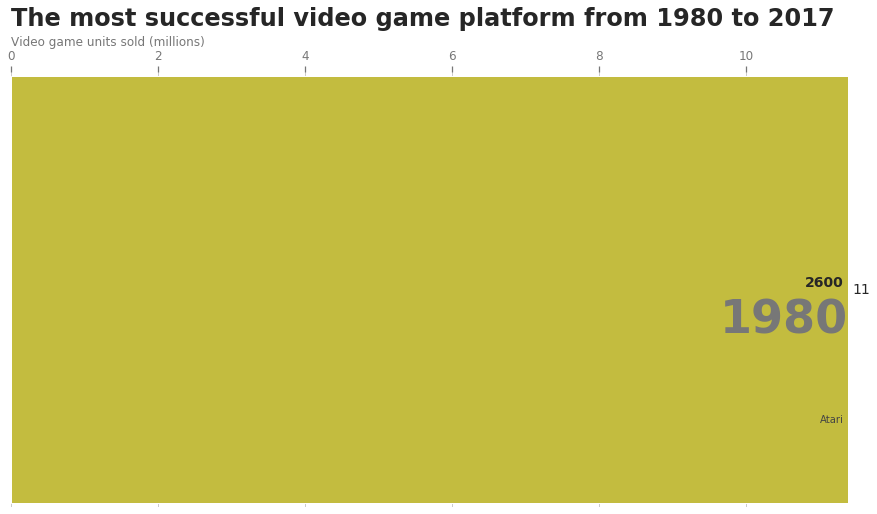

In [173]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_year):
    dff = df_platform_global_sales[df_platform_global_sales['Year'].eq(current_year)].sort_values(by='Global_Sales_Cumsum', ascending=True).tail(5)
    ax.clear()
    ax.barh(dff['Platform'], dff['Global_Sales_Cumsum'], color=[colors[group_lk[x]] for x in dff['Platform']])
    dx = dff['Global_Sales_Cumsum'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Global_Sales_Cumsum'], dff['Platform'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Video game units sold (millions)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'The most successful video game platform from 1980 to 2017',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    plt.box(False)
    
draw_barchart(1980)

In [268]:
current_year = 1990

dff = df_platform_global_sales[df_platform_global_sales['Year'].eq(current_year)].sort_values(by='Global_Sales_Cumsum', ascending=True).tail(8)

cur_rows = dff.shape[0]
new_rows = 8 - dff.shape[0]

dff = dff.append(pd.Series(dtype='Int64'), ignore_index=True)
dff    

,Platform,Year,Global_Sales,Global_Sales_Cumsum,Family
0,GEN,1990,2.6,2.6,Sega
1,SNES,1990,26.16,26.16,Nintendo
2,GB,1990,4.89,71.3,Nintendo
3,NES,1990,15.74,239.26,Nintendo
4,<NA>,<NA>,<NA>,<NA>,<NA>


In [219]:
print(dff)

  Platform  Year  Global_Sales  Global_Sales_Cumsum Family
0     2600  1980         11.38                11.38  Atari


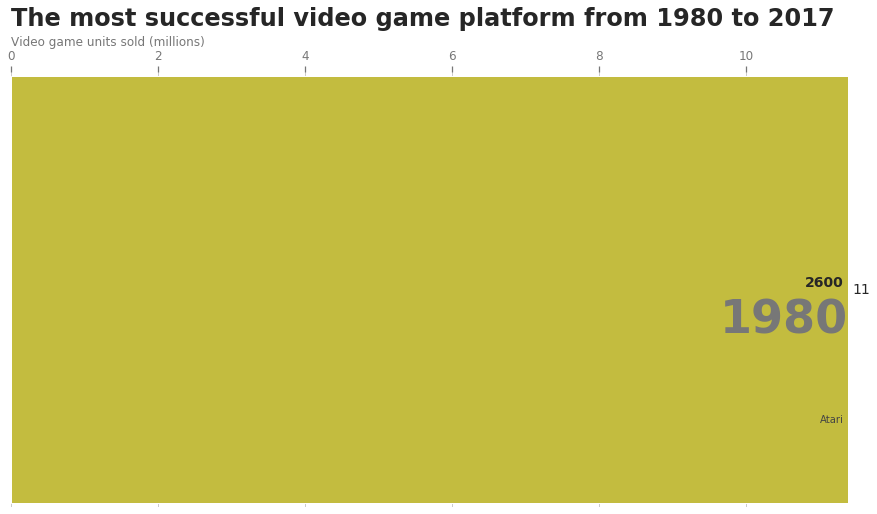

In [171]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1980, 2017))
HTML(animator.to_jshtml())
# or use animator.to_html5_video() or animator.save() 

# Analysis